In [3]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [4]:
%%HTML
<img src="finding_w.png">
<img src="system.png">
<img src="distance.png">
<img src="lagrangien.png">


<p> The problem is quadratic so the space is convex. Thus, any local minimum is global (unllike neural net for instance)</p>

In [5]:

#x : point
#w  : coef
#b : last coef (without x)
#return the distance between a hyperplane and a point
def distance_from_hyperplane(x,w,b):
    num=w.T.dot(x)+b
    den=norm(w)
    return abs(num)/den

#return the closest point with a one_or_minus_one label from the hyperplan (wx+b)
def closest_points(tab,w,b,one_or_minus_one=1):
    mini=1e20
    index=0
    for i,j in enumerate(tab):
        if mini>distance_from_hyperplane(j[:-1],w,b) and j[-1]==one_or_minus_one:
            index=i
            mini=distance_from_hyperplane(j[:-1],w,b)
    return index
            

In [16]:
#compute euclidian norm
def norm(w):
    return np.sum(w**2)**0.5

#generate a set of points of two label (-1,1)
#the label is is the last column
def create_data():
    nb=100
    
    a=np.random.randint(0,20,(nb,2))
    b=np.random.randint(20,40,(nb,2))
    
    tab=np.concatenate((a,b))
    
    a=np.array([-1]*nb+[1]*nb).reshape((-1,1))
    tab=np.concatenate((tab,a),axis=-1)
    
    return tab

#compute the objective function
def objective_function(w,b,lamb,tab):
    obj_list=[]
    for i,j in enumerate(tab):
        obj_list.append(lamb*(j[-1]*(w.T.dot(j[:-1])-1)))
        
    return 0.5*norm(w)**2-np.mean(obj_list)


#plot the separation of the hyperplane
def plot(w,b,tab):
    colors=[]    
    for i in range(0,tab.shape[0]):
        if tab[i,-1]==-1:
            colors.append('red')
        else:
            colors.append('black')

    g = plt.figure(2)
    ax = g.add_subplot(111)
    for i in range(0,tab.shape[0]):
        plt.plot(tab[i,0],tab[i,1],'*',color=colors[i])
    q=np.arange(0,40,1)
    ax.plot(q,-(w[0]*q+b)/w[1])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Hyperplane separating two classes')
    g.show()

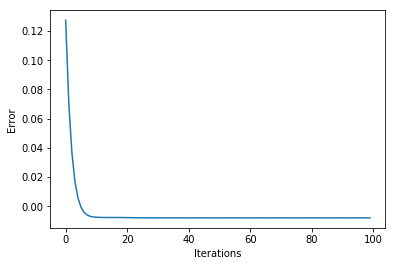

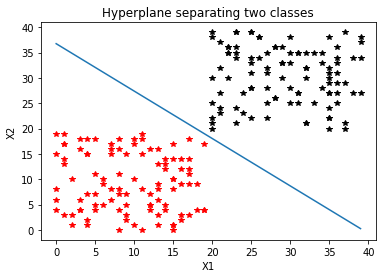

In [20]:

#main function
def svm():
    error_list=[]
    b=np.random.rand()
    #learning rate
    lr=1e-3
    lamb=1e-2
    tab=create_data()
    w=np.random.random((tab.shape[1]-1,1))
    
    
    for i in range(0,100): 
        #get the closest points from the hyperplane with a label of 1 and -1
        sup_one=tab[closest_points(tab,w,b,1),:]
        sup_minus_one=tab[closest_points(tab,w,b,-1),:] 

        error_list.append(objective_function(w,b,lamb,tab))
        for j in range(tab.shape[0]):
            w-=(lr*w)   
            if w.T.dot(tab[j,:-1])*tab[j,-1]+b<1:
                w-=-lr*lamb*(tab[j,:-1]*tab[j,-1]).reshape((1,-1)).T
    #             b-=-lr*lamb*tab[j,-1] cane make it work (compute the derivative on b)

        #we can use the equation where we of the support vectors to determine b
        b=-(w.T.dot(sup_one[:-1])+w.T.dot(sup_minus_one[:-1]))*0.5  
    
    
    plt.clf()
    f = plt.figure(1)
    plt.plot(error_list)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    f.show()
    
    plot(w,b,tab)
    
    plt.show()


svm()